Transformer with Attention


*   Transformerss excel at capturing long-range dependencies,which could be advantageous if spectral bands have complex, non-local interactions related to vomitoxin levels.
*  Unlike CNNs, which focus on local patterns, Transformers use attention to weigh all bands simultaneously, potentially capturing global spectral relationships relevant to vomitoxin.



In [42]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
#Load Datasets
data  = pd.read_csv('/content/TASK-ML-INTERN.csv')

#Dataset Statisticss
print("Dataset Overview:")
print(data.head())
print("\nDataset Information:")
print(data.info())
print("\nDataset Summary Statistics:")
print(data.describe())

Dataset Overview:
           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443   

In [44]:
#Check for missng values
print("\n Missing Values Summary:")
print(data.isnull().sum())


 Missing Values Summary:
hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


In [45]:
#Handle Missing Values
data = data.dropna()

In [46]:
#Statistical Summary
print("\n Statistical Summary:")
print(data.describe())


 Statistical Summary:
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
std      0.044528    0.04

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Load the data
data = pd.read_csv('/content/TASK-ML-INTERN.csv')


# Extracting features and target
X = data.drop(['hsi_id', 'vomitoxin_ppb'], axis=1).values
y = data['vomitoxin_ppb'].values

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Extracting features and target
X = data.drop(['hsi_id', 'vomitoxin_ppb'], axis=1).values
y = data['vomitoxin_ppb'].values

# Log-transform to address skewness in the target variable
y_log = np.log1p(y)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping data for CNN (samples, timesteps, channels)
X_train_scaled = np.expand_dims(X_train_scaled, axis=2)
X_test_scaled = np.expand_dims(X_test_scaled, axis=2)

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model

# Custom Transformer block
def transformer_block(inputs, num_heads, dff, dropout_rate):
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=64)(inputs, inputs)
    attn_output = Dropout(dropout_rate)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attn_output)
    ffn_output = Dense(dff, activation='relu')(out1)
    ffn_output = Dense(inputs.shape[-1])(ffn_output)
    ffn_output = Dropout(dropout_rate)(ffn_output)
    return LayerNormalization(epsilon=1e-6)(out1 + ffn_output)

# Model definition
inputs = Input(shape=(448, 1))
x = Dense(64, activation='relu')(inputs)
x = transformer_block(x, num_heads=4, dff=128, dropout_rate=0.3)
x = transformer_block(x, num_heads=4, dff=128, dropout_rate=0.3)
x = GlobalAveragePooling1D()(x)  # Correct global pooling
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1)(x)

# Create and compile model
model_transformer = Model(inputs, outputs)
model_transformer.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_transformer.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 448, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_38 (Dense)          │ (None, 448, 64)        │            128 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_12   │ (None, 448, 64)        │         66,368 │ dense_38[0][0],        │
│ (MultiHeadAttention)      │                        │                │ dense_38[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_41 (Dropout)      │ (None, 448, 64)        │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_24 (Add)              │ (None, 448, 64)        │              0 │ dense_38[0][0],        │
│                           │                        │                │ dropout_41[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_24    │ (None, 448, 64)        │            128 │ add_24[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_39 (Dense)          │ (None, 448, 128)       │          8,320 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_40 (Dense)          │ (None, 448, 64)        │          8,256 │ dense_39[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_42 (Dropout)      │ (None, 448, 64)        │              0 │ dense_40[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_25 (Add)              │ (None, 448, 64)        │              0 │ layer_normalization_2… │
│                           │                        │                │ dropout_42[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_25    │ (None, 448, 64)        │            128 │ add_25[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_13   │ (None, 448, 64)        │         66,368 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_44 (Dropout)      │ (None, 448, 64)        │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_26 (Add)              │ (None, 448, 64)        │              0 │ layer_normalization_2… │
│                           │                        │                │ dropout_44[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_26    │ (None, 448, 64)        │            128 │ add_26[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 174,977 (683.50 KB)

 Trainable params: 174,977 (683.50 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Compiling the model
model_transformer.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
history = model_transformer.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model performance
test_loss, test_mae = model_transformer.evaluate(X_test_scaled, y_test, verbose=1)

test_loss, test_mae

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 343ms/step - loss: 22.1590 - mae: 3.9499 - val_loss: 11.7917 - val_mae: 2.5313
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.3457 - mae: 2.2995 - val_loss: 10.7644 - val_mae: 2.6187
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.2380 - mae: 2.2152 - val_loss: 10.7859 - val_mae: 2.5659
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.1850 - mae: 2.5508 - val_loss: 11.0877 - val_mae: 2.5530
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.5142 - mae: 2.1491 - val_loss: 10.7775 - val_mae: 2.5619
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.6691 - mae: 2.2979 - val_loss: 11.0335 - val_mae: 2.5368
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.8220 - mae: 2.4471 - val_loss: 10.8960 - val_mae: 2.5558
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.6459 - mae: 2.2263 - val_loss: 10.8270 - val_mae: 2.5821
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step -

(7.922398567199707, 2.038877010345459)

In [52]:
y_pred_log = model_transformer.predict(X_test_scaled.squeeze())

y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test)

# Evaluate regression metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 589ms/step


(4258.099333343504, 16624.94734203988, 0.011248180369961891)

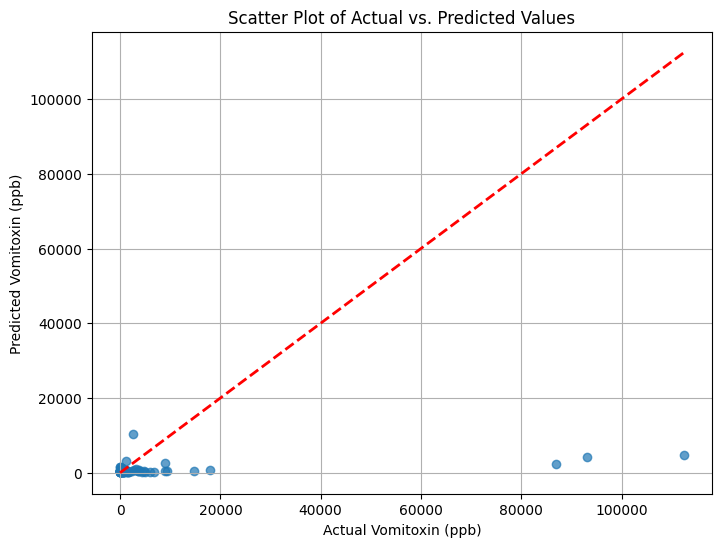

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.grid(True)
plt.show()